In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from utils.helpers import extract_images_and_labels, extract_images
from src.images_preprocessing import preprocess_images

### Visualize

Visualization is done with all images.

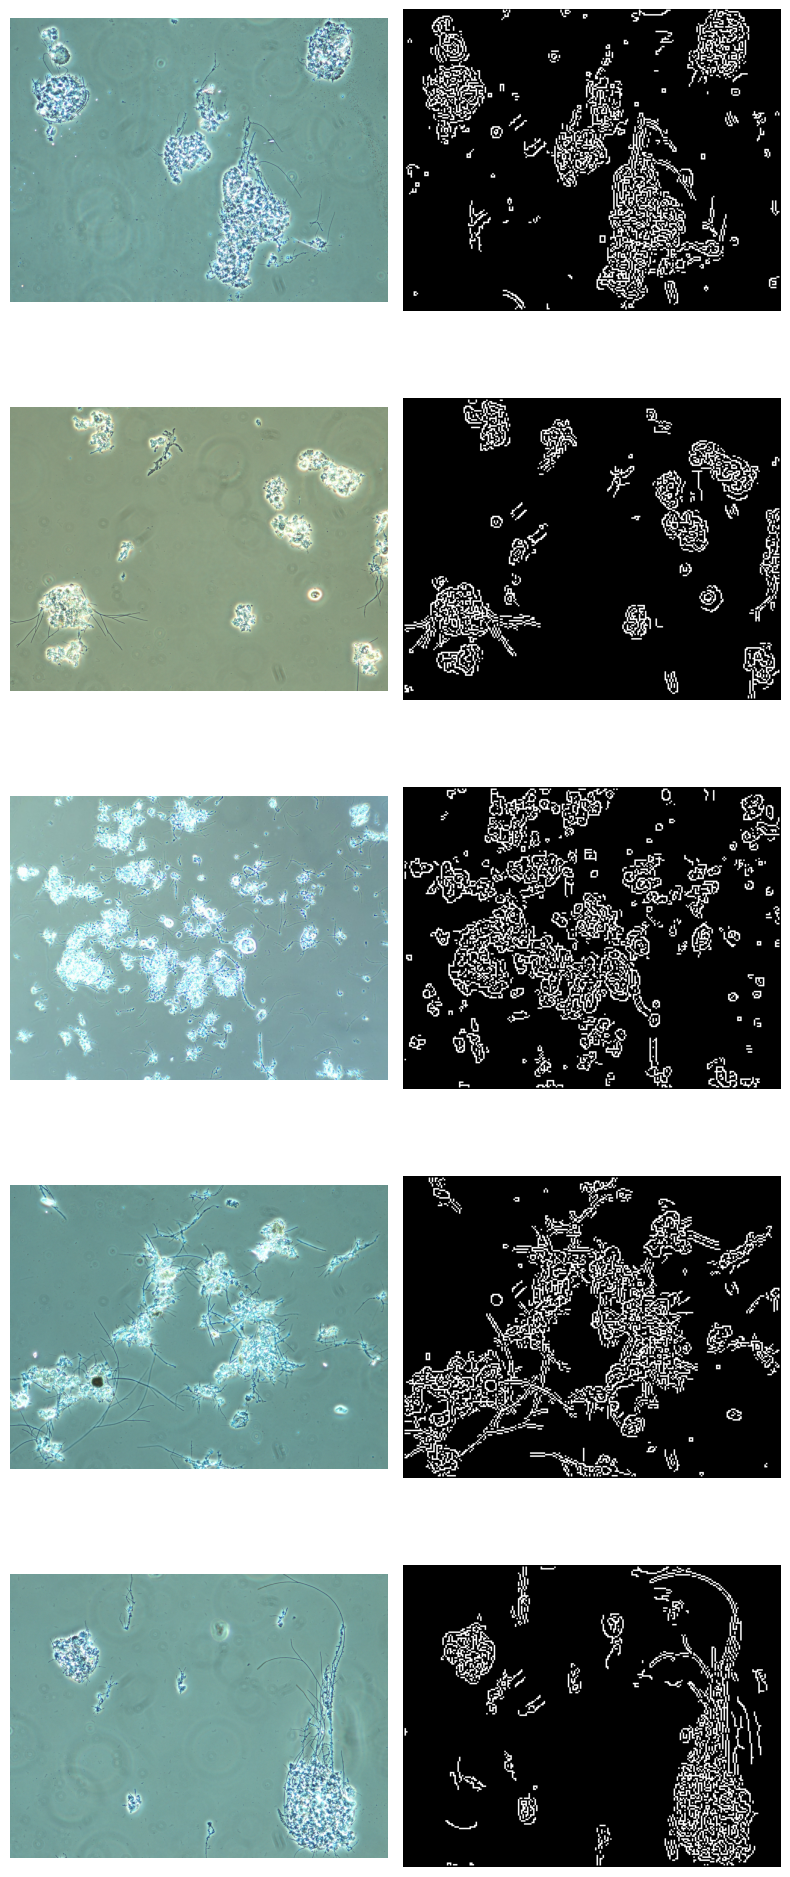

In [5]:
#Load and preprocess images (edge detection + flatten)
base_folder = "data/microscope_images_forvisualisation" #this folder doesn't contain all images (since for some dates no SVI label is available in 2025)
SVI=pd.read_csv('data/SVI.csv', index_col=0)

all_images, all_labels = extract_images_and_labels(base_folder, SVI, image_type='all')

all_images_processed=preprocess_images(all_images=all_images, size=(250,200), method='edges', flatten=True, show_example=True)

In [16]:
perplexity=1000 #default 30
tsne = TSNE(n_components=3,
            perplexity=perplexity, 
            random_state=42)
embeddings_all_visualisation = tsne.fit_transform(all_images_processed)

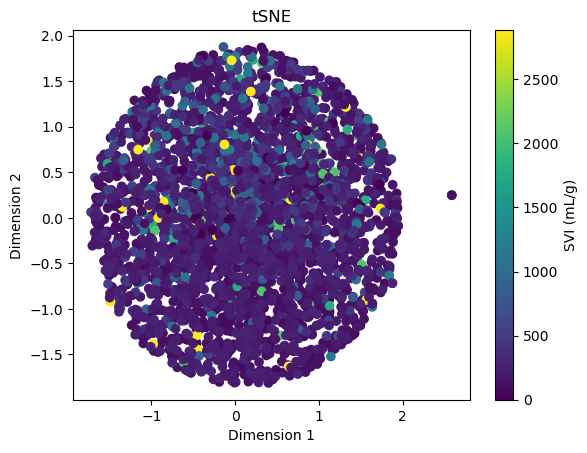

In [17]:
# create 2D figure
plt.figure()
sc=plt.scatter(embeddings_all_visualisation[:,0], embeddings_all_visualisation[:,1], c=all_labels)
cbar = plt.colorbar(sc)
cbar.set_label('SVI (mL/g)') 
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title(f"tSNE")
plt.savefig('results/visualisation/tSNE/2Dscatter_plot_all_images_edgedetection.pdf')
plt.savefig('results/visualisation/tSNE/2Dscatter_plot_all_images_edgedetection.png')
plt.show()

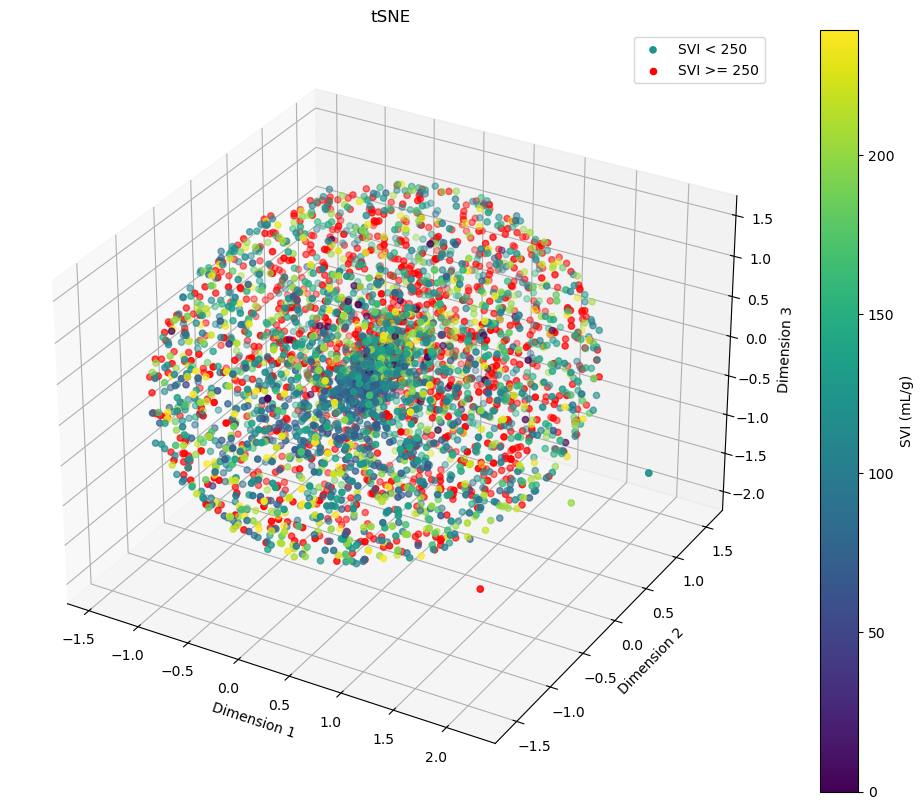

In [18]:
# 3D plot with outliers (SVI>250 in a different colour)
threshold = 250
image_labels2 = all_labels.ravel()
outliers = (image_labels2 > threshold).ravel()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embeddings_all_visualisation[~outliers, 0], 
                embeddings_all_visualisation[~outliers, 1], 
                embeddings_all_visualisation[~outliers, 2], 
                c=all_labels[~outliers], cmap='viridis', label='SVI < 250')
ax.scatter(embeddings_all_visualisation[outliers, 0], 
           embeddings_all_visualisation[outliers, 1], 
           embeddings_all_visualisation[outliers, 2], c='red', label='SVI >= 250')
cbar = plt.colorbar(sc)
cbar.set_label('SVI (mL/g)')
plt.legend()
#ax.view_init(elev=25, azim=30)  # Change elevation and azimuth angles
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_xlim(min(embeddings_all_visualisation[:, 0]), max(embeddings_all_visualisation[:, 0])*0.95)  # Example zoom for x-axis
ax.set_ylim(min(embeddings_all_visualisation[:, 1]), max(embeddings_all_visualisation[:, 1])*0.95)  # Example zoom for y-axis
ax.set_zlim(min(embeddings_all_visualisation[:, 2]), max(embeddings_all_visualisation[:, 2])*0.95)  # Example zoom for z-axis
plt.tight_layout() 
plt.title(f"tSNE")
plt.savefig('results/visualisation/tSNE/3Dscatter_plot_all_images_edgedetection.pdf')
plt.savefig('results/visualisation/tSNE/3Dscatter_plot_all_images_edgedetection.png')
plt.show()

### Save embeddings for HM

To create embeddings to be used in hybrid model, only train images are used. Afterwards, embeddings for all images are created (for evaluation).

!!!!! AttributeError: 'TSNE' object has no attribute 'transform'.
This means that it is not possible to create train vs test embeddings with tSNE.